In [23]:
using DataFrames, CSV, Dates, Pandas, Plots, PyCall

In [24]:
ENV["LINES"] = 20
ENV["COLUMNS"] = 1000

1000

In [25]:
# https://www.insider.com/celebrities-who-have-died-this-year-2021-1
name = ["Hank Aaron", "Ed Asner", "Sonny Chiba", "Halyna Hutchins", "Cloris Leachman", "Helen McCrory", 
    "Prince Philip", "Christopher Plummer", "Tanya Roberts", "Cicely Tyson"]
gender = ["male", "male", "male", "female", "female", "female", "male", "male", "female", "female"]
death_date = ["2021-01-22", "2021-08-29", "2021-08-19", "2021-10-21", "2021-01-27", "2021-04-16",
    "2021-04-09", "2021-02-05", "2021-01-04", "2021-01-28"
]
df = DataFrames.DataFrame(:name => name, :gender => gender, :death => death_date)
df = df[[1, 5, 8, 9, 10], :]

,name,gender,death
,String,String,String
1,Hank Aaron,male,2021-01-22
2,Cloris Leachman,female,2021-01-27
3,Christopher Plummer,male,2021-02-05
4,Tanya Roberts,female,2021-01-04
5,Cicely Tyson,female,2021-01-28


In [26]:
TrendReq = pyimport("pytrends.request").TrendReq
pytrends = TrendReq(hl="en-US", tz=360)
pytrends.build_payload(df.name, timeframe="2020-12-01 2021-08-01")

In [27]:
trends_data = pytrends.interest_over_time().drop("isPartial", 1)

,Hank Aaron,Cloris Leachman,Christopher Plummer,Tanya Roberts,Cicely Tyson
date,,,,,
2020-12-01,0,0,0,0,0
2020-12-02,0,0,0,0,0
2020-12-03,0,0,0,0,0
2020-12-04,0,0,0,0,0
2020-12-05,0,0,0,0,0
...,...,...,...,...,...
2021-07-28,0,0,0,0,0
2021-07-29,0,0,0,0,0
2021-07-30,0,0,0,0,0


In [28]:
trends = Pandas.reset_index(Pandas.DataFrame(trends_data))
jdf = DataFrames.DataFrame(trends)
jdf_tidy = DataFrames.stack(jdf, 2:6)
rename!(jdf_tidy, [:date, :name, :interest])

,date,name,interest
,DateTime,Cat…,Int64
1,2020-12-01T00:00:00,Hank Aaron,0
2,2020-12-02T00:00:00,Hank Aaron,0
3,2020-12-03T00:00:00,Hank Aaron,0
4,2020-12-04T00:00:00,Hank Aaron,0
5,2020-12-05T00:00:00,Hank Aaron,0
6,2020-12-06T00:00:00,Hank Aaron,0
7,2020-12-07T00:00:00,Hank Aaron,0
8,2020-12-08T00:00:00,Hank Aaron,0
9,2020-12-09T00:00:00,Hank Aaron,0


In [29]:
jdf_tidy.date = Date.(jdf_tidy.date)
gender_dict = Dict(Pair.(df.name, df.gender))
death_dict = Dict(Pair.(df.name, df.death))

Dict{String, String} with 5 entries:
  "Cloris Leachman"     => "2021-01-27"
  "Tanya Roberts"       => "2021-01-04"
  "Cicely Tyson"        => "2021-01-28"
  "Hank Aaron"          => "2021-01-22"
  "Christopher Plummer" => "2021-02-05"

In [30]:
jdf_tidy[:, :gender] = Vector{String}(undef, size(jdf_tidy)[1])
jdf_tidy[:, :death_date] = Vector{Date}(undef, size(jdf_tidy)[1])

1220-element Vector{Date}:
 385152176207-04-23
 47036885-03-20
 0001-01-06
 0000-12-31
 -11759220-02-27
 11759222-01-19
 0000-12-31
 -0011-10-14
 ⋮
 -11759220-02-16
 -0011-10-14
 -11759220-01-11
 -0011-10-14
 -0011-10-14
 -0011-10-14
 -0011-10-14

In [31]:
for r in eachrow(jdf_tidy)
    if r.name in collect(keys(gender_dict))
        r.gender = gender_dict[r.name]
    end
    if r.name in collect(keys(death_dict))
        r.death_date = Date(death_dict[r.name], "yyyy-mm-dd")
    end
end

In [32]:
jdf_tidy

,date,name,interest,gender,death_date
,Date,Cat…,Int64,String,Date
1,2020-12-01,Hank Aaron,0,male,2021-01-22
2,2020-12-02,Hank Aaron,0,male,2021-01-22
3,2020-12-03,Hank Aaron,0,male,2021-01-22
4,2020-12-04,Hank Aaron,0,male,2021-01-22
5,2020-12-05,Hank Aaron,0,male,2021-01-22
6,2020-12-06,Hank Aaron,0,male,2021-01-22
7,2020-12-07,Hank Aaron,0,male,2021-01-22
8,2020-12-08,Hank Aaron,0,male,2021-01-22
9,2020-12-09,Hank Aaron,0,male,2021-01-22


In [33]:
function getDayValue(a, b)
    (a - b).value
end

getDayValue (generic function with 1 method)

In [34]:
jdf_tidy.distance = getDayValue.(jdf_tidy.date, jdf_tidy.death_date) 
jdf_tidy

,date,name,interest,gender,death_date,distance
,Date,Cat…,Int64,String,Date,Int64
1,2020-12-01,Hank Aaron,0,male,2021-01-22,-52
2,2020-12-02,Hank Aaron,0,male,2021-01-22,-51
3,2020-12-03,Hank Aaron,0,male,2021-01-22,-50
4,2020-12-04,Hank Aaron,0,male,2021-01-22,-49
5,2020-12-05,Hank Aaron,0,male,2021-01-22,-48
6,2020-12-06,Hank Aaron,0,male,2021-01-22,-47
7,2020-12-07,Hank Aaron,0,male,2021-01-22,-46
8,2020-12-08,Hank Aaron,0,male,2021-01-22,-45
9,2020-12-09,Hank Aaron,0,male,2021-01-22,-44


In [35]:
df_new = jdf_tidy[:, [:interest, :gender, :distance]]
gdf = DataFrames.groupby(df_new, [:gender, :distance])
df_plots = combine(gdf, :interest => mean)

,gender,distance,interest_mean
,String,Int64,Float64
1,male,-52,0.0
2,male,-51,0.0
3,male,-50,0.0
4,male,-49,0.0
5,male,-48,0.0
6,male,-47,0.0
7,male,-46,1.0
8,male,-45,0.0
9,male,-44,0.0


In [36]:
using StatsPlots

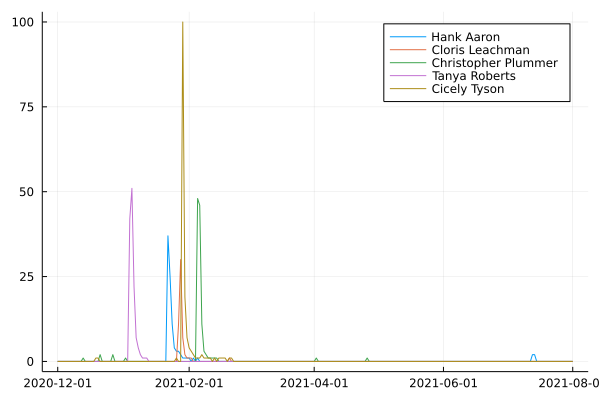

In [37]:
@df jdf_tidy Plots.plot(:date, :interest, group=:name,
    seriestype=:line
)

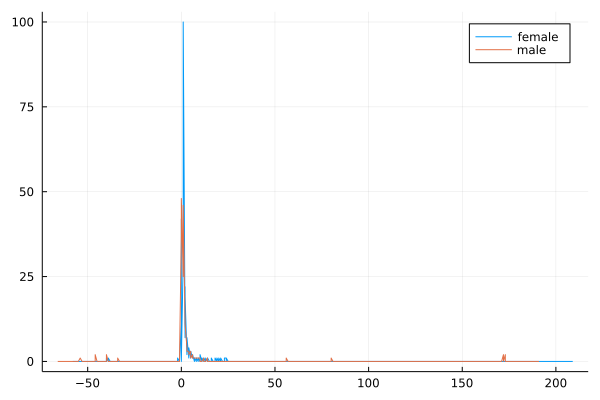

In [38]:
@df jdf_tidy Plots.plot(:distance, :interest, group=:gender,
    seriestype=:line
)

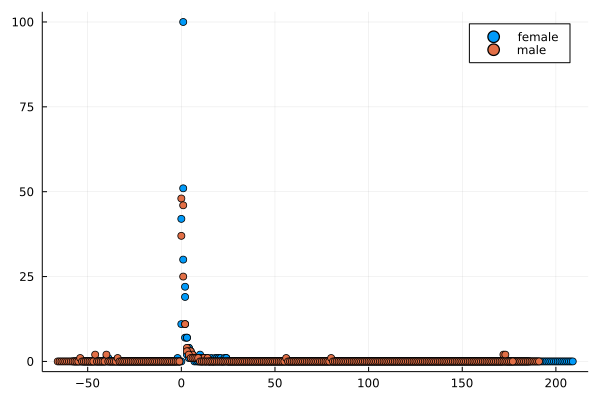

In [39]:
@df jdf_tidy Plots.plot(:distance, :interest, group=:gender,
    seriestype=:scatter
)

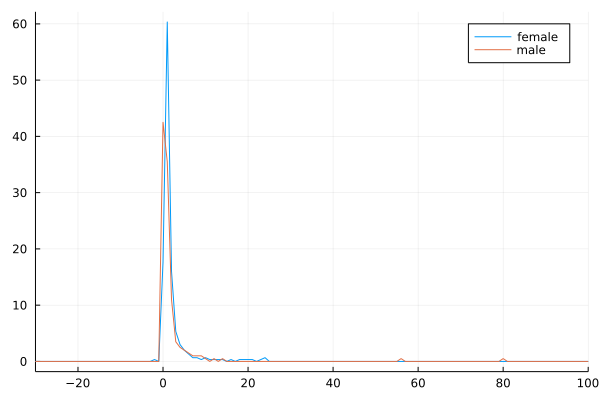

In [40]:
@df df_plots Plots.plot(:distance, :interest_mean, group=:gender,
    seriestype=:line,
    xlim=(-30, 100)
)